In [1]:
import csv
import h5py
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
mass2_TER = []
with open('./mass2_TER.txt', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        mass2_TER.append(row)
mass2_tyIa = [float(num) for num in mass2_TER[0]]
mass2_CCSN = [float(num) for num in mass2_TER[1]]
mass2_LGRB = [float(num) for num in mass2_TER[2]]
mass2_PISN = [float(num) for num in mass2_TER[3]]
        
mass3_TER = []
with open('./mass3_TER.txt', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        mass3_TER.append(row)
mass3_tyIa = [float(num) for num in mass3_TER[0]]
mass3_CCSN = [float(num) for num in mass3_TER[1]]
mass3_LGRB = [float(num) for num in mass3_TER[2]]
mass3_PISN = [float(num) for num in mass3_TER[3]]
        
mass4_TER = []
with open('./mass4_TER.txt', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        mass4_TER.append(row)
mass4_tyIa = [float(num) for num in mass4_TER[0]]
mass4_CCSN = [float(num) for num in mass4_TER[1]]
mass4_LGRB = [float(num) for num in mass4_TER[2]]
mass4_PISN = [float(num) for num in mass4_TER[3]]        
        
mass5_TER = []
with open('./mass5_TER.txt', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        mass5_TER.append(row)
mass5_tyIa = [float(num) for num in mass5_TER[0]]
mass5_CCSN = [float(num) for num in mass5_TER[1]]
mass5_LGRB = [float(num) for num in mass5_TER[2]]
mass5_PISN = [float(num) for num in mass5_TER[3]]
        
mass6_TER = []
with open('./mass6_TER.txt', newline='') as csvfile:  # load data
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        mass6_TER.append(row)
mass6_tyIa = [float(num) for num in mass6_TER[0]]
mass6_CCSN = [float(num) for num in mass6_TER[1]]
mass6_LGRB = [float(num) for num in mass6_TER[2]]
mass6_PISN = [float(num) for num in mass6_TER[3]]

In [3]:
data = h5py.File(f"./data.h5", "r")
SFH = data['SFH']['TNG']

In [4]:
@np.vectorize
def calc_LB(z, omega0, omega1, hubble):
    '''
    Calculates the lookback time according to Hobbs.

    Parameters:
    z : float
        The redshift at which you want to calculate the lookback
    omega0 : float
        The Matter density parameter (0.3111 Planck 2018)
    omega1 : float
        The dark energy density parameter (0.6889 Planck 2018)
    hubble : float
        The hubble parameters (0.6766 Planck 2018)
    '''
    def func(x):
        E = np.sqrt(omega0*(1+x)**3 + omega1)
        return 1/((1+x)*E)
    # can be simplified by already doing the extra coefficient calculations
    t_hubble = (1/(100*hubble))*3.0856776*10**19
    return t_hubble *scipy.integrate.quad(func, 0, z)[0]/(60*60*24*365.2388526)

In [5]:
# TNG cosmology
h = 0.6774
omega_M = 0.3089
omega_L = 0.6911

redshifts = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10]

lb_time10 = calc_LB(redshifts, omega_M, omega_L, h) # lookback time into years
lb_time5 = calc_LB(redshifts[:11], omega_M, omega_L, h)
lb_time2 = calc_LB(redshifts[:8], omega_M, omega_L, h)

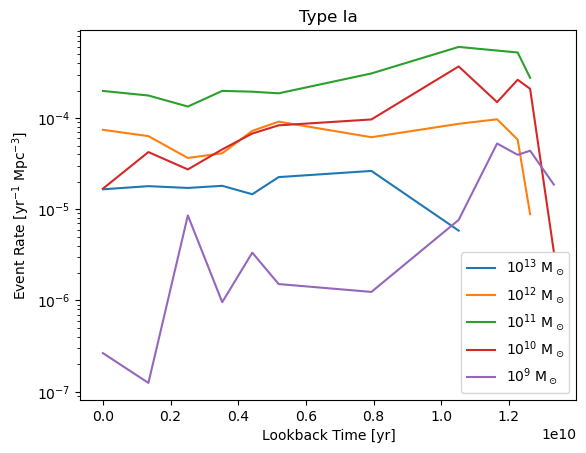

In [6]:
plt.plot(lb_time2, mass2_tyIa, label='$10^{13}$ M$_\odot$')
plt.plot(lb_time5, mass3_tyIa, label='$10^{12}$ M$_\odot$')
plt.plot(lb_time5, mass4_tyIa, label='$10^{11}$ M$_\odot$')
plt.plot(lb_time10, mass5_tyIa, label='$10^{10}$ M$_\odot$')
plt.plot(lb_time10, mass6_tyIa, label='$10^9$ M$_\odot$')
plt.ylabel(r"Event Rate [yr$^{-1}$ Mpc$^{-3}$]")
plt.xlabel(r"Lookback Time [yr]")
plt.title("Type Ia")
plt.legend()
plt.yscale('log')

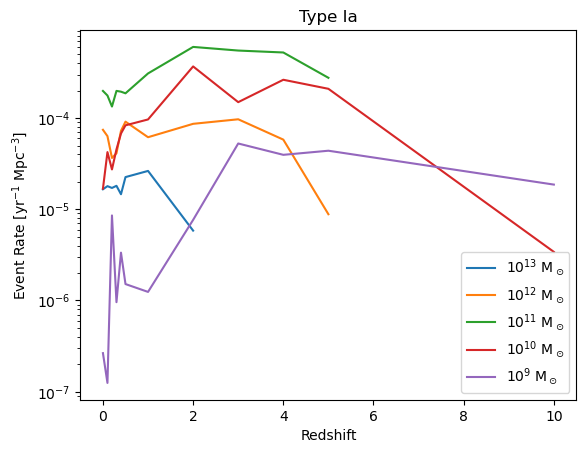

In [7]:
plt.plot(redshifts[:8], mass2_tyIa, label='$10^{13}$ M$_\odot$')
plt.plot(redshifts[:11], mass3_tyIa, label='$10^{12}$ M$_\odot$')
plt.plot(redshifts[:11], mass4_tyIa, label='$10^{11}$ M$_\odot$')
plt.plot(redshifts, mass5_tyIa, label='$10^{10}$ M$_\odot$')
plt.plot(redshifts, mass6_tyIa, label='$10^9$ M$_\odot$')
plt.ylabel(r"Event Rate [yr$^{-1}$ Mpc$^{-3}$]")
plt.xlabel(r"Redshift")
plt.title("Type Ia")
plt.legend()
plt.yscale('log')

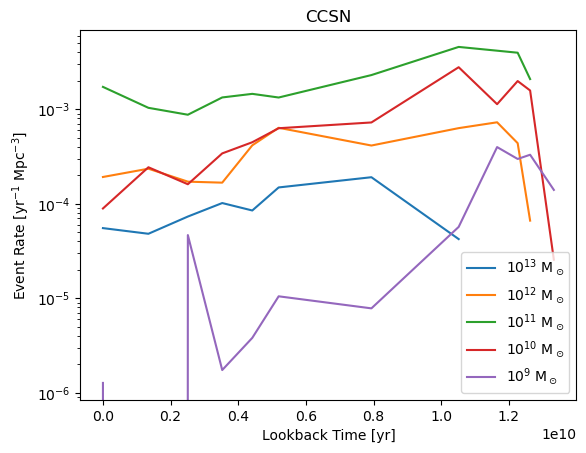

In [8]:
plt.plot(lb_time2, mass2_CCSN, label='$10^{13}$ M$_\odot$')
plt.plot(lb_time5, mass3_CCSN, label='$10^{12}$ M$_\odot$')
plt.plot(lb_time5, mass4_CCSN, label='$10^{11}$ M$_\odot$')
plt.plot(lb_time10, mass5_CCSN, label='$10^{10}$ M$_\odot$')
plt.plot(lb_time10, mass6_CCSN, label='$10^9$ M$_\odot$')
plt.ylabel(r"Event Rate [yr$^{-1}$ Mpc$^{-3}$]")
plt.xlabel(r"Lookback Time [yr]")
plt.title("CCSN")
plt.legend(loc='lower right')
plt.yscale('log')

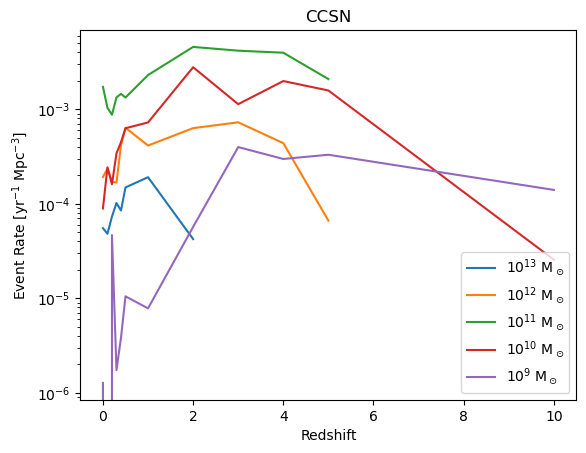

In [9]:
plt.plot(redshifts[:8], mass2_CCSN, label='$10^{13}$ M$_\odot$')
plt.plot(redshifts[:11], mass3_CCSN, label='$10^{12}$ M$_\odot$')
plt.plot(redshifts[:11], mass4_CCSN, label='$10^{11}$ M$_\odot$')
plt.plot(redshifts, mass5_CCSN, label='$10^{10}$ M$_\odot$')
plt.plot(redshifts, mass6_CCSN, label='$10^9$ M$_\odot$')
plt.ylabel(r"Event Rate [yr$^{-1}$ Mpc$^{-3}$]")
plt.xlabel(r"Redshift")
plt.title("CCSN")
plt.legend(loc='lower right')
plt.yscale('log')

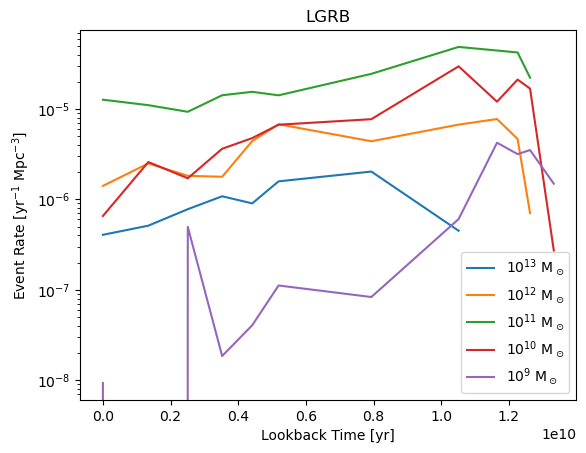

In [10]:
plt.plot(lb_time2, mass2_LGRB, label='$10^{13}$ M$_\odot$')
plt.plot(lb_time5, mass3_LGRB, label='$10^{12}$ M$_\odot$')
plt.plot(lb_time5, mass4_LGRB, label='$10^{11}$ M$_\odot$')
plt.plot(lb_time10, mass5_LGRB, label='$10^{10}$ M$_\odot$')
plt.plot(lb_time10, mass6_LGRB, label='$10^9$ M$_\odot$')
plt.ylabel(r"Event Rate [yr$^{-1}$ Mpc$^{-3}$]")
plt.xlabel(r"Lookback Time [yr]")
plt.title("LGRB")
plt.legend()
plt.yscale('log')

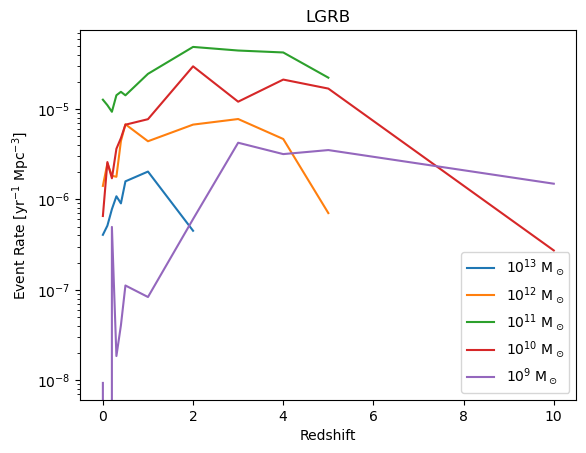

In [11]:
plt.plot(redshifts[:8], mass2_LGRB, label='$10^{13}$ M$_\odot$')
plt.plot(redshifts[:11], mass3_LGRB, label='$10^{12}$ M$_\odot$')
plt.plot(redshifts[:11], mass4_LGRB, label='$10^{11}$ M$_\odot$')
plt.plot(redshifts, mass5_LGRB, label='$10^{10}$ M$_\odot$')
plt.plot(redshifts, mass6_LGRB, label='$10^9$ M$_\odot$')
plt.ylabel(r"Event Rate [yr$^{-1}$ Mpc$^{-3}$]")
plt.xlabel(r"Redshift")
plt.title("LGRB")
plt.legend()
plt.yscale('log')

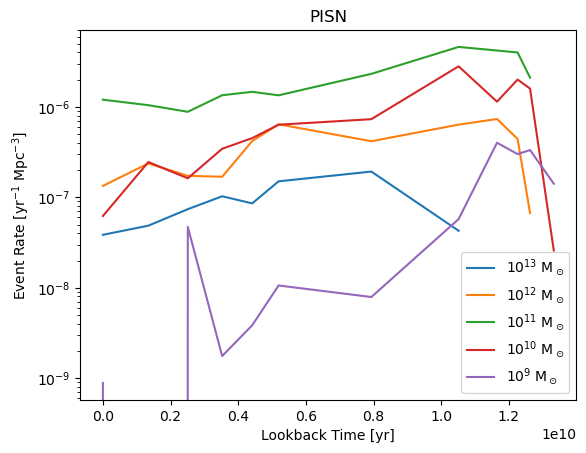

In [12]:
plt.plot(lb_time2, mass2_PISN, label='$10^{13}$ M$_\odot$')
plt.plot(lb_time5, mass3_PISN, label='$10^{12}$ M$_\odot$')
plt.plot(lb_time5, mass4_PISN, label='$10^{11}$ M$_\odot$')
plt.plot(lb_time10, mass5_PISN, label='$10^{10}$ M$_\odot$')
plt.plot(lb_time10, mass6_PISN, label='$10^9$ M$_\odot$')
plt.ylabel(r"Event Rate [yr$^{-1}$ Mpc$^{-3}$]")
plt.xlabel(r"Lookback Time [yr]")
plt.title("PISN")
plt.legend()
plt.yscale('log')

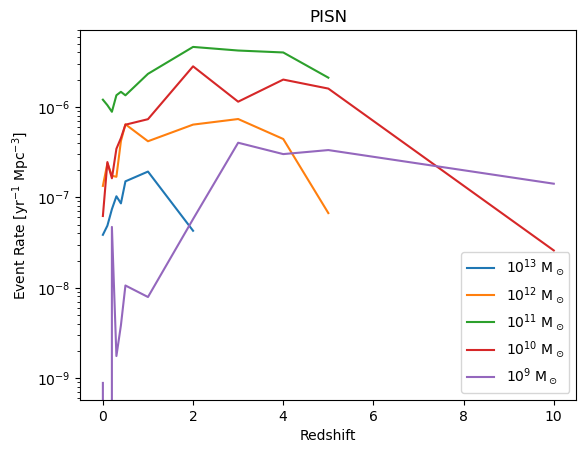

In [13]:
plt.plot(redshifts[:8], mass2_PISN, label='$10^{13}$ M$_\odot$')
plt.plot(redshifts[:11], mass3_PISN, label='$10^{12}$ M$_\odot$')
plt.plot(redshifts[:11], mass4_PISN, label='$10^{11}$ M$_\odot$')
plt.plot(redshifts, mass5_PISN, label='$10^{10}$ M$_\odot$')
plt.plot(redshifts, mass6_PISN, label='$10^9$ M$_\odot$')
plt.ylabel(r"Event Rate [yr$^{-1}$ Mpc$^{-3}$]")
plt.xlabel(r"Redshift")
plt.title("PISN")
plt.legend()
plt.yscale('log')